In [2]:
import os
import pandas as pd
from IPython.display import display, HTML
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import statsmodels.api as sm
## can we please make this a relative path
DATABASE_PATH = "C:\\Users\\Ewan\\Documents\\CodeForBoston\\SafeWater\\git_repo\\my_copy\\data\\simple_time_based_model.csv"

# Allow us to display all the columns in a dataframe
pd.options.display.max_columns = None

In [3]:
df = pd.read_csv(DATABASE_PATH, index_col=False)

C:\Users\Ewan\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (0,7) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
# Calculate the proportion of positive examples
len(df[df['HEALTH_BASED_VIOLATION_THIS_YEAR'] == 1])/len(df)

0.015740520933235844

In [5]:
df.head(20)

,EPA_REGION,POPULATION_SERVED_COUNT,PRIMACY_TYPE,PRIMARY_SOURCE_CODE,PWS_ACTIVITY_CODE,PWSID,PWS_TYPE_CODE,SERVICE_CONNECTIONS_COUNT,STATE_CODE,ZIP_CODE,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO
0,1,39552.0,Tribal,GU,A,010106001,CWS,143,CT,06339-3060,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0
1,1,41185.0,Tribal,GW,I,010109001,NTNCWS,1,NaN,NaN,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1,37860.0,Tribal,SWP,A,010109005,CWS,20,CT,06382,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0
3,1,84.0,Tribal,GW,A,010307001,CWS,33,MA,02535,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0
4,1,30.0,Tribal,GW,I,010502001,TNCWS,2,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,1,30.0,Tribal,GW,A,010502002,NTNCWS,1,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0
6,1,30.0,Tribal,GW,A,010502003,NTNCWS,4,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,7.0,2.0,4.0,0.0
7,1,40.0,Tribal,GW,I,010502004,TNCWS,1,RI,02813,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0
8,2,296.0,Tribal,GW,A,020000001,CWS,120,NY,14779,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
9,2,20.0,Tribal,GW,I,020000002,CWS,90,NY,14779,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [6]:
df.count()

EPA_REGION                                       2106220
POPULATION_SERVED_COUNT                          2106220
PRIMACY_TYPE                                     2106215
PRIMARY_SOURCE_CODE                              2092795
PWS_ACTIVITY_CODE                                2106220
PWSID                                            2106220
PWS_TYPE_CODE                                    2106215
SERVICE_CONNECTIONS_COUNT                        2106220
STATE_CODE                                       2061130
ZIP_CODE                                         2012760
YEAR                                             2106220
HEALTH_BASED_VIOLATION_THIS_YEAR                 2106220
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    2106220
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS

In [7]:
df.drop(['PRIMACY_TYPE', 'PRIMARY_SOURCE_CODE', 
         'PWS_ACTIVITY_CODE', 'PWSID', 'PWS_TYPE_CODE', 
         'SERVICE_CONNECTIONS_COUNT', 'ZIP_CODE'], 
        axis='columns', inplace=True)
df.count()

EPA_REGION                                       2106220
POPULATION_SERVED_COUNT                          2106220
STATE_CODE                                       2061130
YEAR                                             2106220
HEALTH_BASED_VIOLATION_THIS_YEAR                 2106220
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    2106220
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO      2106220
NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO          2106220
NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO      2106220
NUM_ENFORCEMENTS_PREVIOUS_YEAR                   2106220
NUM_ENFORCEMENTS_2_YEARS_AGO                     2106220
NUM_ENFORCEMENTS_3_YEARS_AGO   

In [8]:
df = df.dropna(axis='index')
df['EPA_REGION'] = df['EPA_REGION'].astype(int)

In [9]:
display(df.count())
display(df.dtypes)


EPA_REGION                                       2061130
POPULATION_SERVED_COUNT                          2061130
STATE_CODE                                       2061130
YEAR                                             2061130
HEALTH_BASED_VIOLATION_THIS_YEAR                 2061130
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        2061130
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    2061130
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          2061130
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      2061130
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          2061130
NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO      2061130
NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO          2061130
NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO      2061130
NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO          2061130
NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO      2061130
NUM_ENFORCEMENTS_PREVIOUS_YEAR                   2061130
NUM_ENFORCEMENTS_2_YEARS_AGO                     2061130
NUM_ENFORCEMENTS_3_YEARS_AGO   

EPA_REGION                                         int32
POPULATION_SERVED_COUNT                          float64
STATE_CODE                                        object
YEAR                                             float64
HEALTH_BASED_VIOLATION_THIS_YEAR                 float64
NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR        float64
NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR    float64
NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO          float64
NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO      float64
NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO          float64
NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO      float64
NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO          float64
NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO      float64
NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO          float64
NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO      float64
NUM_ENFORCEMENTS_PREVIOUS_YEAR                   float64
NUM_ENFORCEMENTS_2_YEARS_AGO                     float64
NUM_ENFORCEMENTS_3_YEARS_AGO   

In [10]:
df_one_hot = pd.get_dummies(df, columns=['EPA_REGION', 'STATE_CODE'])
df_one_hot.head()

,POPULATION_SERVED_COUNT,YEAR,HEALTH_BASED_VIOLATION_THIS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_NON_HEALTH_BASED_VIOLATIONS_PREVIOUS_YEAR,NUM_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_2_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_3_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_4_YEARS_AGO,NUM_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_NON_HEALTH_BASED_VIOLATIONS_5_YEARS_AGO,NUM_ENFORCEMENTS_PREVIOUS_YEAR,NUM_ENFORCEMENTS_2_YEARS_AGO,NUM_ENFORCEMENTS_3_YEARS_AGO,NUM_ENFORCEMENTS_4_YEARS_AGO,NUM_ENFORCEMENTS_5_YEARS_AGO,EPA_REGION_1,EPA_REGION_2,EPA_REGION_3,EPA_REGION_4,EPA_REGION_5,EPA_REGION_6,EPA_REGION_7,EPA_REGION_8,EPA_REGION_9,EPA_REGION_10,STATE_CODE_AK,STATE_CODE_AL,STATE_CODE_AR,STATE_CODE_AS,STATE_CODE_AZ,STATE_CODE_BC,STATE_CODE_CA,STATE_CODE_CO,STATE_CODE_CT,STATE_CODE_DC,STATE_CODE_DE,STATE_CODE_FL,STATE_CODE_GA,STATE_CODE_GU,STATE_CODE_HI,STATE_CODE_IA,STATE_CODE_ID,STATE_CODE_IL,STATE_CODE_IN,STATE_CODE_KS,STATE_CODE_KY,STATE_CODE_LA,STATE_CODE_MA,STATE_CODE_MD,STATE_CODE_ME,STATE_CODE_MI,STATE_CODE_MN,STATE_CODE_MO,STATE_CODE_MP,STATE_CODE_MS,STATE_CODE_MT,STATE_CODE_NB,STATE_CODE_NC,STATE_CODE_ND,STATE_CODE_NE,STATE_CODE_NH,STATE_CODE_NJ,STATE_CODE_NM,STATE_CODE_NS,STATE_CODE_NV,STATE_CODE_NY,STATE_CODE_OH,STATE_CODE_OK,STATE_CODE_ON,STATE_CODE_OR,STATE_CODE_PA,STATE_CODE_PQ,STATE_CODE_PR,STATE_CODE_RI,STATE_CODE_SC,STATE_CODE_SD,STATE_CODE_TN,STATE_CODE_TX,STATE_CODE_UT,STATE_CODE_VA,STATE_CODE_VI,STATE_CODE_VT,STATE_CODE_WA,STATE_CODE_WI,STATE_CODE_WV,STATE_CODE_WY
0,39552.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,90.0,1.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,37860.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,84.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,5.0,4.0,2.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,30.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,30.0,2018.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,2.0,0.0,5.0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
# Split the data into explanatory and target variables. Also split into train and test sets.
Y = df_one_hot['HEALTH_BASED_VIOLATION_THIS_YEAR']
X = df_one_hot.drop(['HEALTH_BASED_VIOLATION_THIS_YEAR'], axis='columns')
X_train, X_test, y_train, y_test = train_test_split(df_one_hot, Y, 
                                                    test_size=0.15, random_state=42,
                                                    stratify=Y)

In [12]:
display(X_train.shape)
display(X_test.shape)
display(len(X_test) / (len(X_test) + len(X_train)))
display(y_train.shape)
display(y_test.shape)
display(y_train)
display(len(y_train[y_train==1])/len(y_train))
display(len(y_test[y_test==1])/len(y_test))

(1751960, 89)

(309170, 89)

0.15000024258537792

(1751960,)

(309170,)

1204420    0.0
949162     0.0
1561551    0.0
1758798    0.0
1062123    0.0
1811615    0.0
961242     0.0
464591     0.0
1193747    0.0
425317     0.0
1852784    0.0
107934     0.0
98000      0.0
1256733    0.0
1646738    0.0
42396      0.0
872216     0.0
1349722    0.0
1678666    0.0
807112     0.0
450224     0.0
572188     0.0
362613     0.0
1199298    0.0
1663243    0.0
1876724    0.0
1407811    0.0
1254294    0.0
219424     0.0
1080938    0.0
          ... 
84035      0.0
1083052    1.0
81612      0.0
1194804    0.0
782760     0.0
487406     0.0
1008679    0.0
460497     0.0
1312520    0.0
1506803    0.0
953061     0.0
56957      0.0
614682     0.0
764019     0.0
1683909    0.0
1854655    0.0
1060330    0.0
1653187    0.0
81702      0.0
1586202    0.0
938020     0.0
346185     0.0
1633274    0.0
1564999    0.0
674570     0.0
1958085    0.0
1076502    0.0
1625860    0.0
734952     0.0
148449     0.0
Name: HEALTH_BASED_VIOLATION_THIS_YEAR, Length: 1751960, dtype: float64

0.01604717002671294

0.0160461881812595

In [13]:
# scale the datasets
scale_transformer = StandardScaler(copy=True).fit(X_train)
X_train_scaled = scale_transformer.transform(X_train)
X_test_scaled = scale_transformer.transform(X_test)

# reduce dimensions
pca_transformer = PCA(2).fit(X_train_scaled)
pca = PCA(2)
pca.fit(X_train_scaled)
print(pca.components_)
print(pca.explained_variance_)
X_train_2d = pca.transform(X_train_scaled)

[[ 6.56616258e-03 -6.24332885e-03  1.51323526e-01  2.51086647e-01
   1.90446562e-01  2.74037129e-01  2.15574583e-01  2.79917103e-01
   2.19576069e-01  2.73275241e-01  2.16114686e-01  2.51278577e-01
   1.98812977e-01  2.85937944e-01  3.02278228e-01  2.87393491e-01
   2.64379044e-01  2.31671952e-01  3.50518412e-03 -2.99077587e-03
   1.67848101e-02 -1.51802954e-02 -6.98623665e-02  6.98755482e-02
   1.99398574e-02  2.11833656e-02  1.58341066e-02  7.72193989e-03
   1.66120508e-02 -5.25446129e-03  4.76746616e-03  1.39129115e-02
   1.90869543e-02 -2.57967633e-04  3.92227739e-03  7.80978069e-03
  -4.21046868e-03  7.28896101e-04 -1.16493228e-03 -2.08746736e-02
  -2.99416947e-03  9.88076332e-04  9.68875682e-04  5.41047779e-03
   3.77348417e-03 -3.35841203e-02 -2.44348362e-03  1.11690660e-02
   1.28519789e-03  1.41600310e-02  4.31091267e-03 -3.13183405e-03
   2.45506125e-03 -2.79027369e-02 -3.17147379e-02  1.66606269e-02
  -8.93741770e-05  3.64718322e-02  1.56429705e-02  8.18578866e-04
  -6.82145

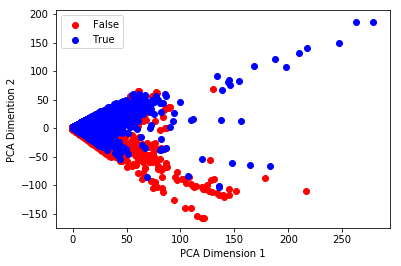

In [14]:
false_samples = X_train_2d[y_train==0]
true_samples = X_train_2d[y_train==1]
plt.scatter(false_samples[:, 0], false_samples[:, 1], c='r', label='False')
plt.scatter(true_samples[:, 0], true_samples[:, 1], c='b', label='True')
plt.xlabel("PCA Dimension 1")
plt.ylabel("PCA Dimention 2")
plt.legend()



## Next steps

In [ ]:
# Run Logit model on sample of training data
# sm_fitted_logit = sm.Logit(y_train, sm.add_constant(X_train)).fit()
# sm_fitted_logit.summary2()
# Plot learning curves, assess whether we are in a high bias situation
# Run Logit model on all available data